In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

In [3]:
us_temperatures=pd.read_csv('datasets/US-Temperatures-CSV.csv',delimiter=',')
us_temperatures_df = pd.DataFrame(us_temperatures)
us_temperatures_df.columns = us_temperatures_df.iloc[0]
us_temperatures_df = us_temperatures_df[1:]
#us_temperatures_df.to_csv('datasets/US-Temperatures-CSV2.csv', index=False) 
us_temperatures_df.head()
#us_temperatures_df.shape[1]

,Year,Annual_Mean,Lowess(5)
1,1880,-0.31,-0.07
2,1881,0.16,-0.16
3,1882,0.11,-0.25
4,1883,-0.75,-0.32
5,1884,-0.52,-0.4


In [4]:
us_temperatures_df['Year'] = pd.to_numeric(us_temperatures_df['Year'])
us_temperatures_df['Annual_Mean'] = pd.to_numeric(us_temperatures_df['Annual_Mean'])
#Annual_Mean_C = []
#Annual_Mean_C.append

In [5]:
temp_cTo_F = [(x*9/5)+ 32 for x in us_temperatures_df['Annual_Mean']]
#(0°C × 9/5) + 32 = 32°F
#(-0.31°C × 9/5) + 32 = 31.442°F
#temp_cTo_F

In [6]:
us_temperatures_df["Annual_Mean"] = temp_cTo_F
us_temperatures_df.tail(25)

,Year,Annual_Mean,Lowess(5)
114,1993,31.370,0.38
115,1994,32.936,0.31
116,1995,32.774,0.33
117,1996,31.910,0.44
118,1997,32.306,0.55
119,1998,34.376,0.63
120,1999,33.926,0.72
121,2000,33.260,0.8
122,2001,33.692,0.82
123,2002,33.260,0.8


In [7]:
#U.S. surface temp increased by 3.16°F (past 25 yrs)
change = us_temperatures_df.iloc[137]['Annual_Mean'] #2017
#change
change2 = us_temperatures_df.iloc[113]['Annual_Mean'] #1993 - 25 years-ish
#change2
change3 = change-change2
change3

3.1679999999999957

In [8]:
us_temp_decade = us_temperatures_df.groupby((us_temperatures_df.Year//10)*10).mean()
us_temp_decade

,Year,Annual_Mean
Year,,
1880,1884.5,31.47440
1890,1894.5,31.56080
1900,1904.5,31.77320
1910,1914.5,31.57880
1920,1924.5,32.02520
1930,1934.5,32.81720
1940,1944.5,32.26460
1950,1954.5,32.31140
1960,1964.5,31.81100


In [9]:
#U.S. surface temperature has increased at an average rate of about 0.53°F/decade since the 1990s
annual_mean_list = us_temp_decade.Annual_Mean
res = [y - x for x, y in zip(annual_mean_list[12:], annual_mean_list[13:])]
import statistics
x = statistics.mean(res)
Average_Change = (f"Average  Change: {round(x,2)}")
print(Average_Change)

Average  Change: 0.53


<IPython.core.display.Javascript object>


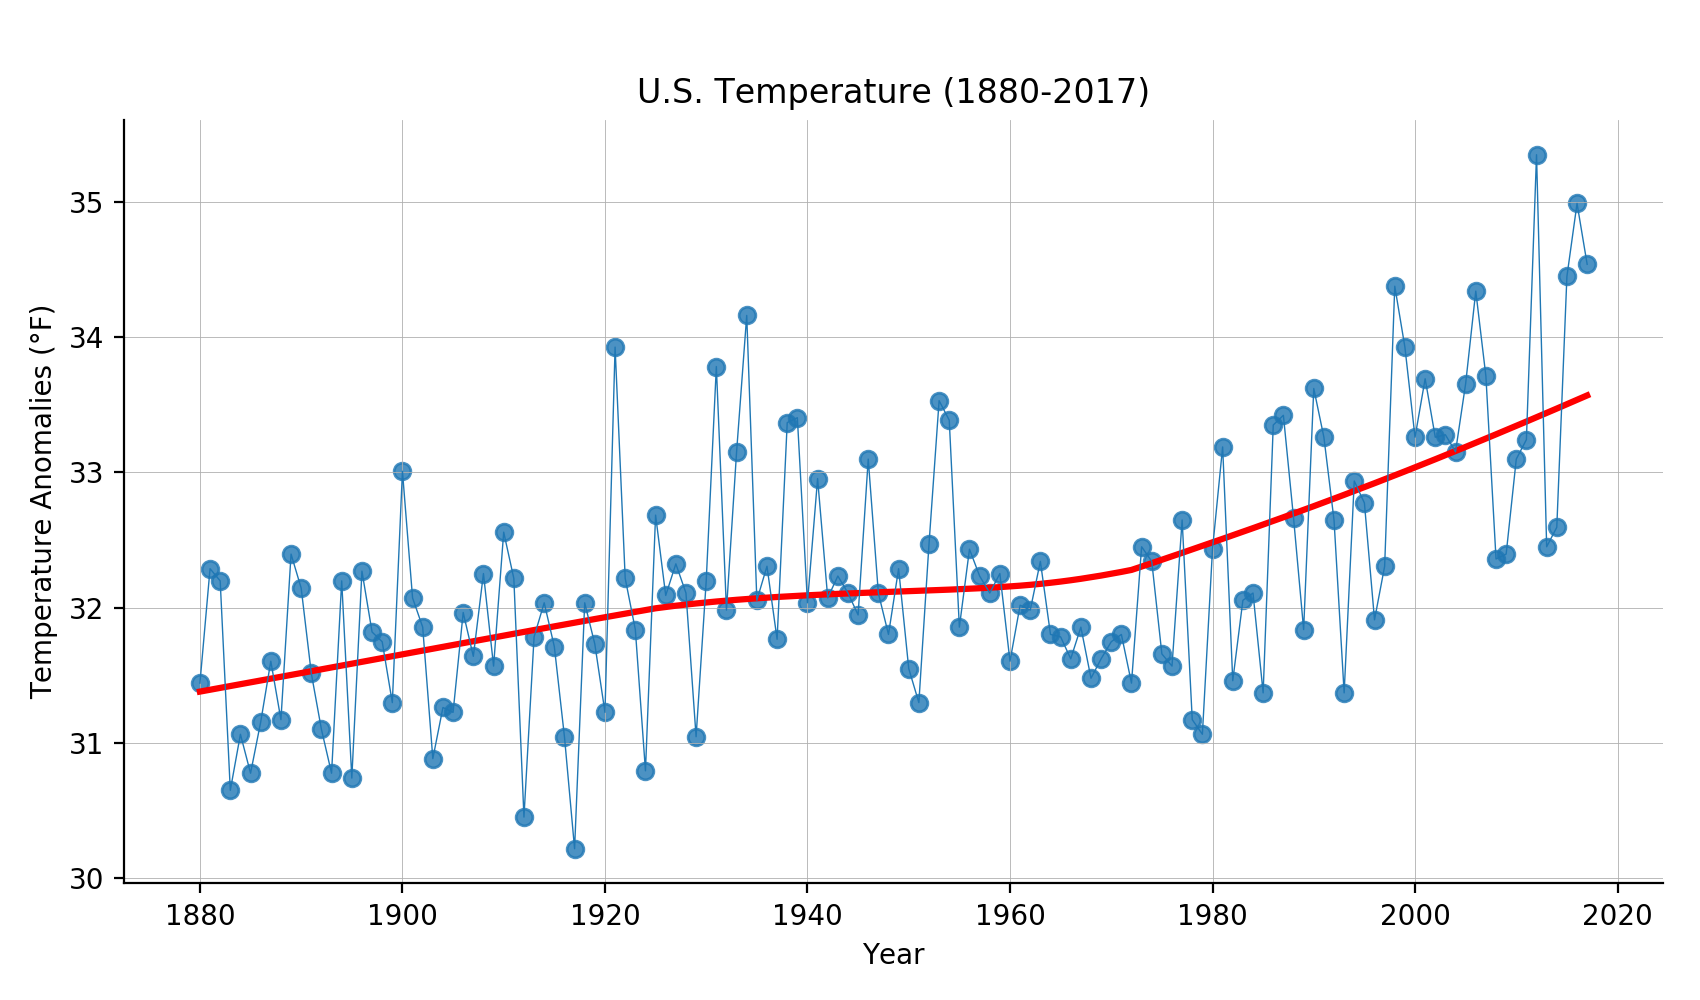

In [10]:
#us_temperatures_df.plot(kind="scatter", x="Year", y="Annual_Mean", figsize=(10,5),
            #  title="Annual Mean Temp Change in the US (1880-2017)",linewidth=.2)
sns.lmplot(x="Year", y="Annual_Mean", data=us_temperatures_df,lowess=True,line_kws={'color': 'red'},height=5, aspect=1.7)
plt.title("U.S. Temperature (1880-2017)")
#lowess = sm.nonparametric.lowess
x=us_temperatures_df["Year"]
y=us_temperatures_df["Annual_Mean"]
plt.plot(x,y,linewidth=.5)
plt.xlabel('Year')
plt.ylabel('Temperature Anomalies (°F)')
plt.grid(True,linewidth=.3)
plt.subplots_adjust(top=.88)
plt.show()
plt.savefig('Annual_US_Temp.png')
#Change names of axes
#Add a line -- A lowess smoothing line?
#Lowess: https://stackoverflow.com/questions/23784399/how-to-visualize-a-nonlinear-relationship-in-a-scatter-plot

In [63]:
#sns.lmplot(x="Year", y="Annual_Mean", data=us_temperatures_df,lowess=True)
#plt.ylabel('Temperature Anomaly (°F)')
#plt.title("Annual Mean Temp Change in the US (1880-2017)")
#https://seaborn.pydata.org/tutorial/regression.html
#plt.grid(True)
#plt.show()